In [1]:
import pandas as pd

amzn_data = pd.read_csv("data/AMZN.csv", header=0)

In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Close prices for prediction and scaling to [0,1]
data = amzn_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define training data length (80% of the data)
train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_data_len]

# Prepare the data for LSTM model
X_train = []
y_train = []

# 60일 간의 데이터를 기반으로 다음 날의 값을 예측하는 훈련 데이터를 생성하는 역할
for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape X_train for LSTM model: (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Prepare test data and predictions
test_data = scaled_data[train_data_len - 60:]
X_test = []
y_test = data[train_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting using the trained model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/100


2024-11-11 22:52:06.557976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 22:52:06.558424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 22:52:06.559009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/5 [==============================] - 1s 16ms/step - loss: 0.3485
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0421
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0423
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0113
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0184
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0083
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0094
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0077
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0071
Epoch 10/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0071
Epoch 11/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0065
Epoch 12/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0067
Epoch 13/100
5/5 [==============================] - 0s 15ms/s

2024-11-11 22:52:15.425923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-11 22:52:15.426578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-11 22:52:15.426959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

/var/folders/08/wh2xr5050kq2g5wcmx_r3vhh0000gn/T/ipykernel_86298/1708722154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


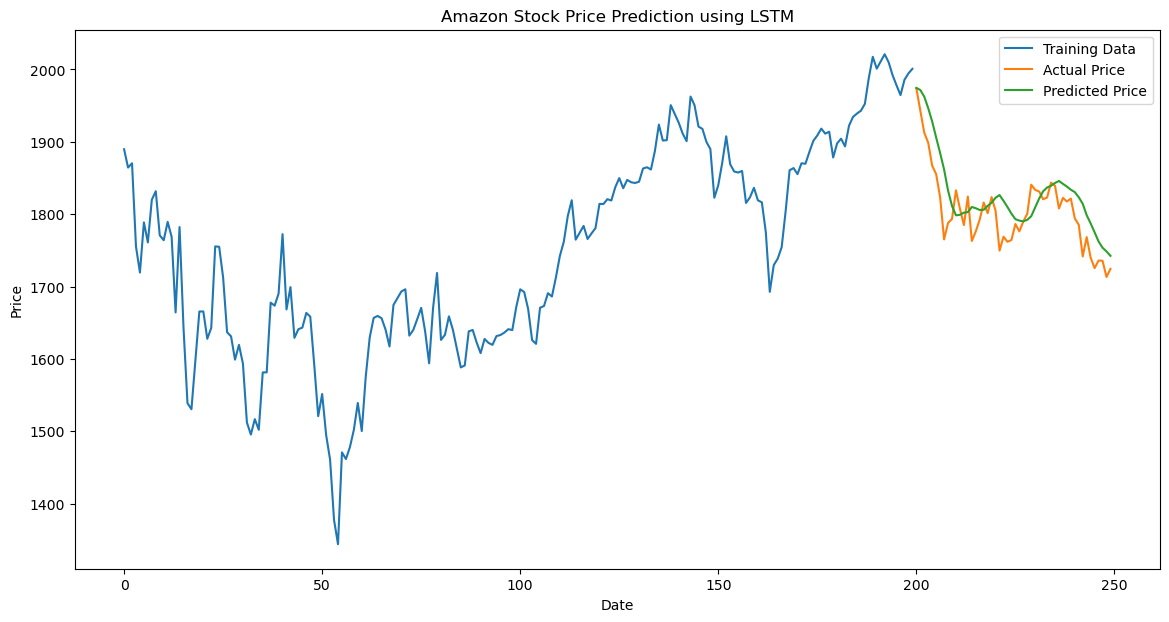

In [4]:
import matplotlib.pyplot as plt

# Visualize the predictions
train = amzn_data[:train_data_len]
valid = amzn_data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 7))
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.title('Amazon Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()